# Muhammad Irvan Hakim
# 2109106057
# Posttest 7 (CNN)

### Link Dataset: https://www.kaggle.com/datasets/mbkinaci/image-localization-dataset

#### Import Library

In [135]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpig
import os

#### Membuat objek ImageDataGenerator dengan beberapa konfigurasi augmentasi

In [136]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.45,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

#### Tampilkan dataset yang akan digunakan

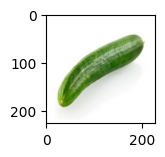

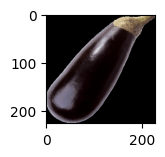

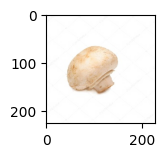

In [137]:
class_names = ['cucumber','eggplant','mushroom']
for i in range(3):
    paths = os.path.join('image', class_names[i], class_names[i]+'_1.jpg')
    if class_names[i]=='cucumber':
        cucumber = 'cucumber'
        paths = os.path.join('image', cucumber, class_names[i]+'_1.jpg')
    image = plt.imread(paths)
    plt.subplot(3, 1, 1)
    plt.imshow(image)
    plt.show()

#### Buat datagen untuk mendeklarasikan ImageDataGenerator

In [138]:
IMG_PATH = 'image'
img_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=0.45,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'
)

#### Kemudian ambil dataset melalui datagen yang telah dibuat serta simpan hasil augmentasi

In [139]:
img_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,

    # Parameter untuk menyimpan data (Pastikan folder 'augmented' telah dibuat)
    class_mode='categorical',
    save_to_dir='augmented',
    save_prefix='aug',
    save_format='jpg'
)
for i in range(5):
    img_generator.next()

Found 186 images belonging to 3 classes.


#### Bagi Dataset Menjadi Train Set dengan jumlah 80% dari jumlah dataset dan Validation Set dengan jumlah 20% dari jumlah dataset. Lalu buat kembali Datagen yang akan digunakan untuk modelling

In [140]:
img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

train_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)
validation_generator = img_datagen.flow_from_directory(
    IMG_PATH,
    target_size=(150,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 150 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


#### Buat test_datagen yang akan digunakan untuk memvalidasi data nya menggunakan folder gambar 'test_split' yang telah dibuat secara manual

In [141]:
TEST_PATH = 'test_split'

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=0.45,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(150, 150),
    batch_size=8,
    shuffle=True,
    class_mode='categorical',
)

Found 15 images belonging to 3 classes.


#### Membuat arsitektur CNN

In [142]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
    input_shape=[150,150,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Melatih model dengan data latih yang diberikan oleh train_generator, sekaligus memvalidasi kinerja model dengan data validasi yang diberikan oleh val_generator selama 15 epoch

In [143]:
hasil = model.fit(train_generator,validation_data=validation_generator, epochs=15)

Epoch 1/15


5/5 [==============================] - 2s 180ms/step - loss: 1.1197 - accuracy: 0.3667 - val_loss: 1.0754 - val_accuracy: 0.3333
Epoch 2/15
5/5 [==============================] - 1s 146ms/step - loss: 1.0535 - accuracy: 0.4400 - val_loss: 1.0228 - val_accuracy: 0.3611
Epoch 3/15
5/5 [==============================] - 1s 146ms/step - loss: 0.9271 - accuracy: 0.5600 - val_loss: 0.7719 - val_accuracy: 0.6111
Epoch 4/15
5/5 [==============================] - 1s 157ms/step - loss: 0.5832 - accuracy: 0.8000 - val_loss: 0.3377 - val_accuracy: 0.8889
Epoch 5/15
5/5 [==============================] - 1s 162ms/step - loss: 0.3784 - accuracy: 0.8600 - val_loss: 0.3788 - val_accuracy: 0.8611
Epoch 6/15
5/5 [==============================] - 1s 150ms/step - loss: 0.5927 - accuracy: 0.7933 - val_loss: 0.2553 - val_accuracy: 0.8889
Epoch 7/15
5/5 [==============================] - 1s 147ms/step - loss: 0.4240 - accuracy: 0.8467 - val_loss: 0.4575 - val_accuracy: 0.8333
Epoch 8/15
5/5 [===============

#### Mengevaluasi model menggunakan test_generator

In [144]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 51ms/step - loss: 0.3802 - accuracy: 0.9333


[0.38022762537002563, 0.9333333373069763]

#### Mengakses metrik akurasi dan validasi dari hasil pelatihan model.

In [145]:
training_accuracy = hasil.history['accuracy']
validation_accuracy = hasil.history['val_accuracy']

#### Menampilkan grafik pergerakan akurasi selama pelatihan dan validasi model.

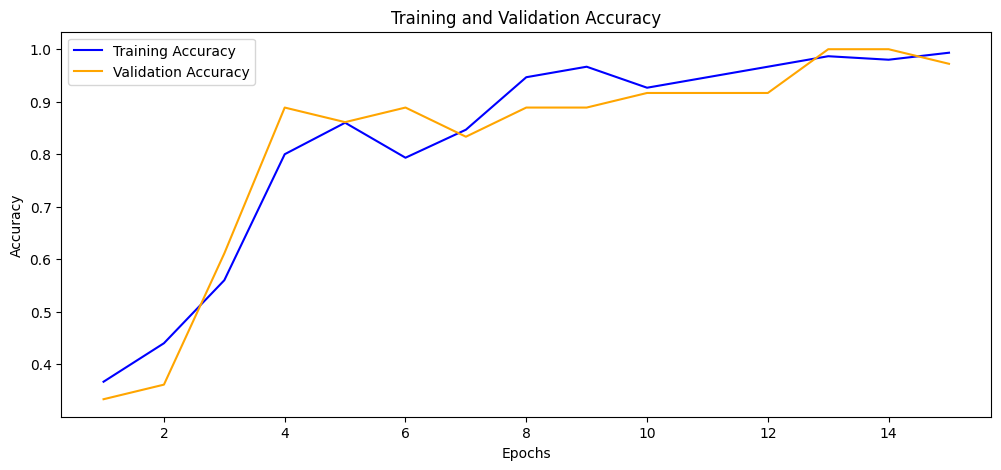

In [146]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy',  color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Menyimpan nilai loss selama pelatihan dan validasi model.

In [147]:
training_loss = hasil.history['loss']
validation_loss = hasil.history['val_loss']

#### Menampilkan perubahan loss selama pelatihan model dengan membandingkan data training (biru) dan data validasi (orange). Semakin rendah loss, semakin baik performa model.

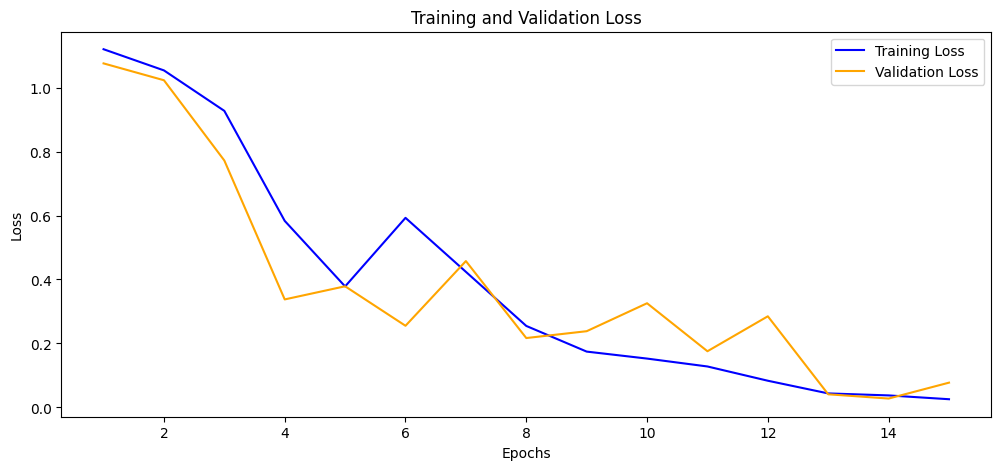

In [148]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss',  color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()